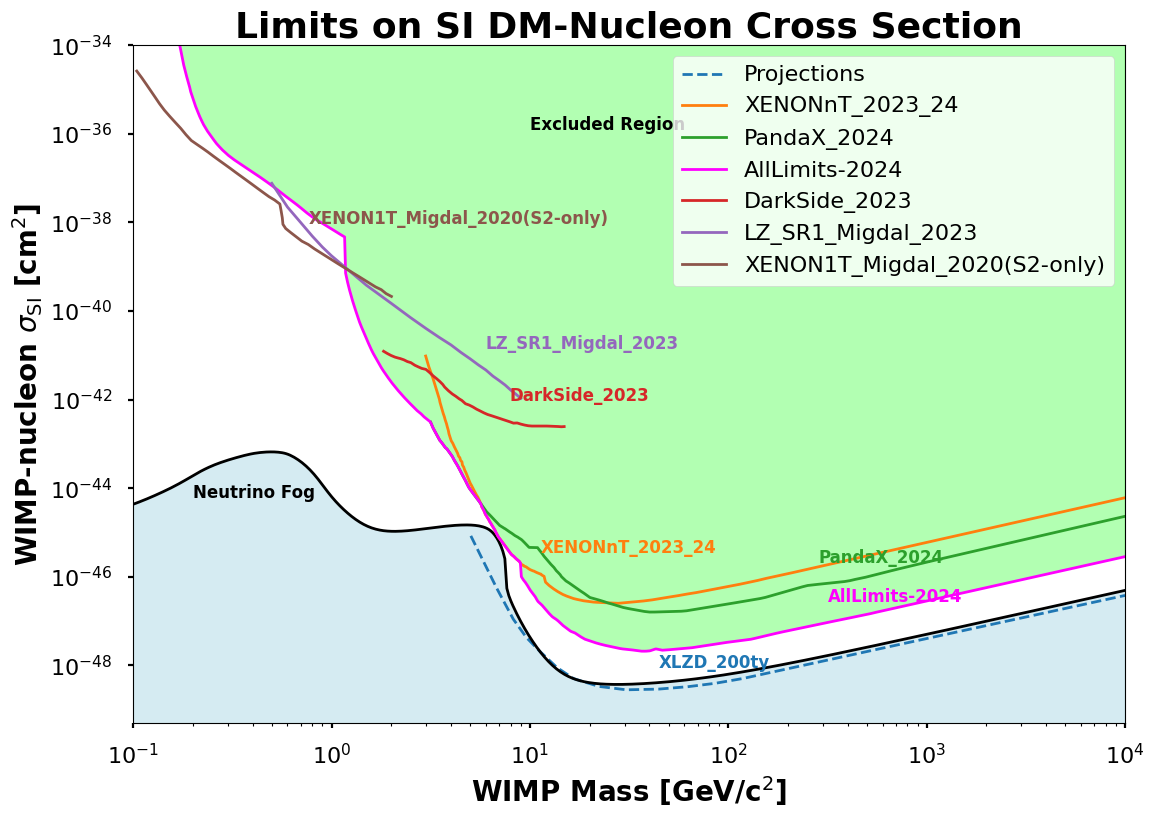

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_data_from_files(master_path, filenames):
    # Apply seaborn style for aesthetics
    plt.style.use('seaborn-v0_8-poster')
  
    # Create a figure and axis for the plot
    a,ax = plt.subplots()

    
    # Initialize labels for legend
    projection_label = 'Projections'
    #actual_data_label = 'Actual Data'
    # Flags to track if labels have been added
    label_added_projection = False
    #label_added_actual = False
    
    # Loop through the filenames, load data, and plot each one
    for filename in filenames:
        file_path = os.path.join(master_path, filename)
        
        # Check if file exists
        if os.path.exists(file_path):
            
            data = np.loadtxt(file_path)
            x = data[:, 0]
            y = data[:, 1]
            
            # Plot based on filename conditions
            if filename != 'neutrino_fog.txt' and filename != 'XLZD_200ty.txt' and filename != 'AllLimits-2024.txt' : 
                line, = ax.plot(x, y, label=filename.replace('.txt', ''), lw=2)
                
            elif filename == 'XLZD_200ty.txt':  # Plot XLZD with a dashed line
                line, = ax.plot(x, y, label=filename.replace('.txt', ''), lw=2, linestyle='--') 
                if not label_added_projection:
                    line.set_label(projection_label)
                    label_added_projection = True  
                    
            elif filename == 'neutrino_fog.txt':  
                ax.plot(x, y, color='black', lw=2)  
                ax.fill_between(x, y, color='lightblue', alpha=0.5)  # Fill area under curve with light blue
                ax.text(0.2, 5e-45,  
            "Neutrino Fog", color='black', fontsize=12, ha='left', va='bottom', fontweight='bold')
            

                
            elif filename == 'AllLimits-2024.txt': 
                line, = ax.plot(x, y, color="magenta",label=filename.replace('.txt', ''), lw=2) 
                ax.fill_between(x, y, 1e-34, color='lime', alpha=0.3)  # Fill area above the curve
                ax.text(1e1, 1e-36,  
            'Excluded Region', color='black', fontsize=12, ha='left', va='bottom', fontweight='bold')
            
            if filename != 'neutrino_fog.txt':  
                ax.text(x[int(len(x) * 0.7)], y[int(len(x) * 0.7)] * 2.4, filename.replace('.txt', ''),
                        color=line.get_color(), fontsize=12, ha='left', va='bottom', fontweight='bold')
        
        else:
            print(f"File {filename} not found in the directory.")
    
    # Set log scale for both axes
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    # Set axis limits
    ax.set_xlim([0.1, 1e4])
    ax.set_ylim([5e-50, 1e-34])
    
    # Set labels for axes with larger font
    ax.set_xlabel(r'WIMP Mass [GeV/c$^2$]', fontsize=20,fontweight='bold')
    ax.set_ylabel(r'WIMP-nucleon $\sigma_{\rm SI}$ [cm$^2$]', fontsize=20,fontweight='bold')
    
    # Set title with a larger font
    ax.set_title("Limits on SI DM-Nucleon Cross Section", fontsize=26,fontweight='bold')
    
    # Increase font size of axis ticks
    #ax.tick_params(axis='both', which='major', labelsize=20)
    #ax.tick_params(axis='both', which='minor', labelsize=20)
    
    # Add the legend at the top-right of the plot
    ax.legend(loc='upper right')
    
    # Display the plot with tight layout
    #plt.tight_layout()
    plt.show()

# Example usage:
master_path = '/Users/amirr/Desktop/Plotting'  # Path to your directory
filenames = [
    'XLZD_200ty.txt', 'neutrino_fog.txt',
    'XENONnT_2023_24.txt', "PandaX_2024.txt","AllLimits-2024.txt","DarkSide_2023.txt","LZ_SR1_Migdal_2023.txt","XENON1T_Migdal_2020(S2-only).txt"
]  # List of your filenames
plot_data_from_files(master_path, filenames)


The data for plotting these curves is hosted on : https://github.com/cajohare/DirectDetectionPlots/tree/main/data/limits/Nucleon/SI

Neutrino Fog : 

Neutrinos interactions, such as Coherent Elastic neutrino Nucleus Scattering (CEvNS) or neutrinos elastic scattering, are of particular interest to the under- standing of this elusive particle properties but can also be used as a probe to study unreachable systems such as the core of nuclear power plant or the Sun,

In addition to the neutrino-electron scattering, neutrinos can also scatter off the nu- cleus through the exchange of a Z0 boson (NC). In the case of a low-energy neutrino (< O(100) MeV) the neutrino will interact coherently10 with the whole nucleus, while at higher energy, it will interact with the individual nucleons (or quarks). In 1974, Daniel Z. Freedman predicted the existence of an elastic scattering process that would benefit from a coherent enhancement proportional to the size of the nucleus, called coherent elastic neutrino-nucleus scattering [95].

Here, the floor is defined as the SI WIMP-nucleon cross-section for which an experiment has a 90% probability to detect a WIMP with a scattering cross-section of at least that size at ≥ 3σ.

 is important to mention that CEvNS doesn't represent a strict limit which makes,the WIMP direct detection search impossible (the notion of neutrino floor used in the
past). It is rather a background source whose signature depends on the neutrino source
energy and only impacts some specific part of the (σSI, m ) parameter space, displayed nχ
in figure 2.19 for xenon target, while the rest remains accessible through larger exposure, It is important to emphasise that the neutrino floor does not pose a hard limit for future experiments such as XLZD. This is explored in greater detail in reference [230], which discusses the alternative formulation of a so-called ‘neutrino fog.’ The basic idea is that with sufficient exposure, the floor can be pushed past due to small differences in spectral shape between WIMPs and neutrinos. Furthermore, the neu- trino floor, defined robustly in reference [230] as the boundary of the neutrino fog
 234 of 265
6.3. WIMPs in different design scenarios 6. Design considerations for XLZD
 via a calculation free from assumptions about exposure and threshold, depends on the neutrino flux uncertainties. A reduction in these as a result of future measure- ment results from dedicated neutrino experiments will thus push down the neutrino floor and extend the WIMP parameter space that XLZD can probe.


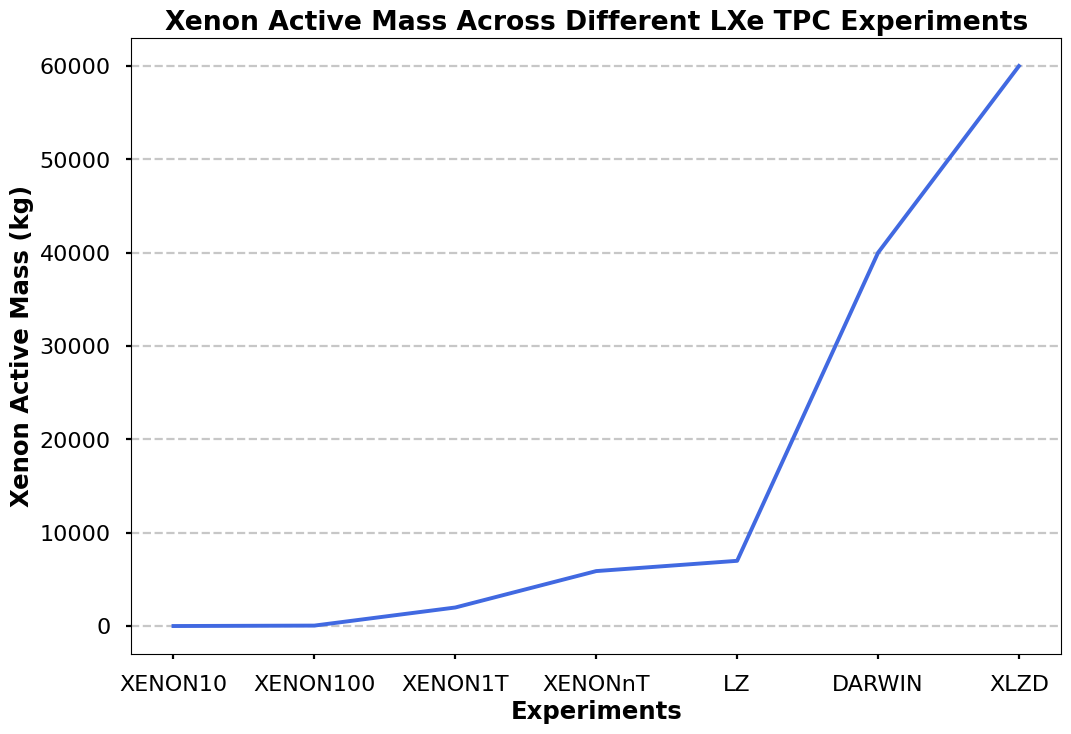

In [12]:
import matplotlib.pyplot as plt

# Experiment names
experiments = ["XENON10", "XENON100", "XENON1T", "XENONnT", "LZ","DARWIN", "XLZD"]

# Corresponding Xenon mass (in kg)
xenon_mass = [15, 62, 2000, 5900, 7000,40000,60000]
# Create plot
plt.figure(figsize=(12,8))
plt.plot(experiments, xenon_mass, color='royalblue')
plt.xlabel("Experiments",fontweight="bold")
plt.ylabel("Xenon Active Mass (kg)",fontweight="bold")
plt.title("Xenon Active Mass Across Different LXe TPC Experiments", fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.style.use('seaborn-v0_8-poster')
plt.show()
